In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
tr_addr = '../input/pre/train_'
te_addr = '../input/pre/test_'
print 'getting user_info...'
user_info_train = pd.read_csv(tr_addr + 'user_info.csv')
user_info_test  = pd.read_csv(te_addr + 'user_info.csv')
user_info = pd.concat([user_info_train, user_info_test])
del user_info_train, user_info_test
print user_info.head()

Populating the interactive namespace from numpy and matplotlib
getting user_info...
   id   loan_time  sex  job  edu  marriage  loc_type
0   1  5914855887    1    2    3         1         3
1   2  5914855887    1    2    3         2         1
2   3  5914855887    1    4    4         1         4
3   4  5914855887    1    4    4         3         2
4   5  5914855887    1    2    2         3         1


getting bill_detail...
471009


D:\Program\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(array([  6.26030000e+04,   5.19880000e+04,   4.95820000e+04,
          4.00400000e+04,   3.55570000e+04,   3.52410000e+04,
          2.58500000e+04,   2.31960000e+04,   2.01200000e+04,
          1.47370000e+04,   1.37820000e+04,   9.35900000e+03,
          7.84800000e+03,   5.10400000e+03,   4.64900000e+03,
          3.28100000e+03,   3.01600000e+03,   2.11000000e+03,
          1.50800000e+03,   1.07700000e+03,   9.95000000e+02,
          7.56000000e+02,   5.73000000e+02,   5.53000000e+02,
          3.83000000e+02,   1.82000000e+02,   2.70000000e+02,
          8.00000000e+00,   0.00000000e+00,   1.30000000e+01]),
 array([  6.94444444e-07,   1.03865486e-02,   2.07724028e-02,
          3.11582569e-02,   4.15441111e-02,   5.19299653e-02,
          6.23158194e-02,   7.27016736e-02,   8.30875278e-02,
          9.34733819e-02,   1.03859236e-01,   1.14245090e-01,
          1.24630944e-01,   1.35016799e-01,   1.45402653e-01,
          1.55788507e-01,   1.66174361e-01,   1.76560215e-01,
      

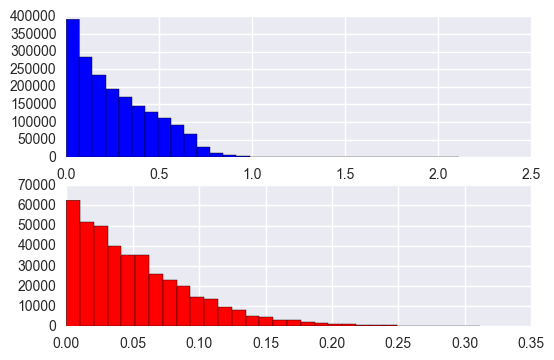

In [19]:
print 'getting bill_detail...'
bill_train = pd.read_csv(tr_addr + 'bill_detail.csv')
bill_test  = pd.read_csv(te_addr + 'bill_detail.csv')
bill = pd.concat([bill_train, bill_test])
bill = bill.merge(user_info[['id', 'loan_time']], on=['id'], how='left')
print len(bill[bill['tm_encode_3'] == 0])

bill['tm_encode_3'] = (bill['tm_encode_3'] - bill['loan_time'])/(3600*24*1000)

bill1 = bill[bill['tm_encode_3'] < 0]
bill1 = bill1[bill['tm_encode_3'] > -5]
bill2 = bill[bill['tm_encode_3'] > 0]

fig, axes = plt.subplots(2,1)
axes[0].hist(-bill1['tm_encode_3'],bins = 30, color = 'b')  
axes[1].hist(bill2['tm_encode_3'],bins = 30, color = 'r') 

In [ ]:
user_info_train = pd.read_csv(tr_addr + 'user_info.csv')
bill_train = pd.read_csv(tr_addr + 'bill_detail.csv')
bill_cols = ['tm_encode_3','prior_account', 'prior_repay','credit_limit','current_balance', 'minimun_repay',
             'consume_count','account', 'adjust_account','cycle_interest', 'avaliable_balance',
             'cash_limit', 'repay_state']
group_feats = bill_train[bill_cols].groupby(bill_train['id']).mean()
data = user_info_train.merge(group_feats, left_on = 'id', right_index = True,how = 'left')

data = data.merge()
data = data.corr()  
sns.heatmap(data) 